In [114]:
from alpha_vantage.foreignexchange import ForeignExchange
import matplotlib.pyplot as plt
cc = ForeignExchange(key='OGRPFV5D58LC77OL',output_format='pandas')
import pandas as pd
from datetime import datetime
import numpy as np
from numpy.polynomial.polynomial import polyfit
# get_currency_exchange_intraday()
# get_currency_exchange_daily()
# get_currency_exchange_weekly()
# get_currency_exchange_monthly()
#data_daily, meta_data = cc.get_currency_exchange_daily(from_symbol='EUR',to_symbol='USD', outputsize='full')
df60, meta_data = cc.get_currency_exchange_intraday(from_symbol='EUR',to_symbol='USD',interval='60min', outputsize='full')
dfd, meta_data = cc.get_currency_exchange_daily(from_symbol='EUR',to_symbol='USD', outputsize='full')
dfw, meta_data = cc.get_currency_exchange_weekly(from_symbol='EUR',to_symbol='USD', outputsize='full')
pd.set_option('display.max_rows', 100)

In [115]:
df60.reset_index(inplace=True) #reset index to get timestamp out
df60.columns = ['timestamp','open','high','low','close'] #Make sure column names are legit    
df60 = df60[df60.timestamp.dt.weekday < 5] #Filter out all weekend data
df60['index'] = np.arange(len(df60)) #create an index 

dfd.reset_index(inplace=True) #reset index to get timestamp out
dfd.columns = ['timestamp','open','high','low','close'] #Make sure column names are legit    
dfd = dfd[dfd.timestamp.dt.weekday < 5] #Filter out all weekend data
dfd['index'] = np.arange(len(dfd)) #create an index 

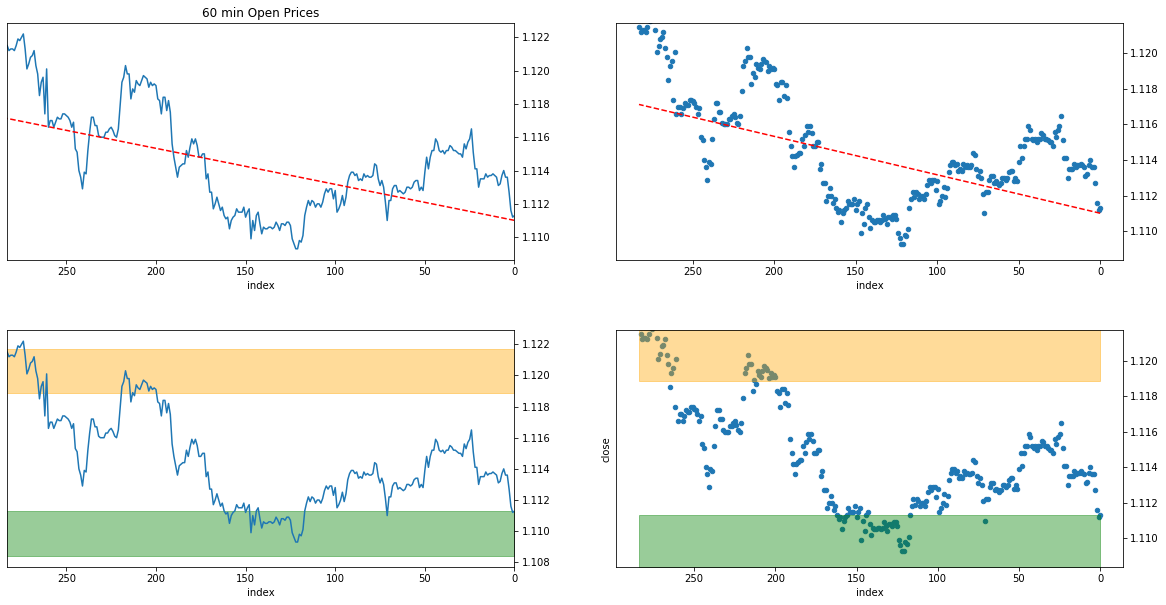

In [136]:
_low = 'low'
_high = 'high'
_open = 'open'
_close = 'close'
_val = 'low'

def Set_Ylim(df,ax):
    ax.set_ylim([df[_val].min(),df[_val].max()])

def Plot_HiLowBars(df,ax):
    ax.fill_between([0,df['index'].count()],df[_low].quantile(0.2), df[_low].min(),alpha=0.4,color='green')
    ax.fill_between([0,df['index'].count()],df[_low].max(),df[_low].quantile(0.9),alpha=0.4,color='orange')
    ax.yaxis.tick_right()
    ax.invert_xaxis()

def Plot_errorLine(df,ax):
    b, m = polyfit(df['index'], df[_low], 1)
    ax.plot(df['index'], b + m * df['index'], 'r--')
    ax.yaxis.tick_right()
    ax.invert_xaxis()

    
#Set the main figure proportions
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.3)

# Divide the figure into a 2x2 grid, and set sections to ax1 and ax2
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


df60.plot(x='index', y='close', ax=ax1, legend=False)
df60.plot(x='index', y='close', ax=ax2, kind = 'scatter')
df60.plot(x='index', y='close', ax=ax3, legend=False)
df60.plot(x='index', y='close', ax=ax4, kind = 'scatter')

ax2.yaxis.set_label_text("")
ax1.set_title('60 min Open Prices')

Set_Ylim(df60,ax2)
Set_Ylim(df60,ax4)

Plot_errorLine(df60,ax1)
Plot_errorLine(df60,ax2)

Plot_HiLowBars(df60,ax3)
Plot_HiLowBars(df60,ax4)

In [117]:
df60['index'].count()

284

In [119]:
#df60.to_csv('filtered.csv')